<a href="https://colab.research.google.com/github/wanlichen2024/gdda612_project1/blob/main/708Assessment_partC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [76]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/marketing_campaign.csv', delimiter='\t')

In [77]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [78]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [79]:
np.random.seed(42)

total_elements = df.size

# 计算需要设置为缺失值的元素数量
num_missing = int(total_elements * 0.001)

# 随机选择要设置为缺失值的元素的位置
missing_positions = np.random.choice(total_elements, num_missing, replace=False)

# 将数据框展平为一维数组，以便于索引
flattened_df = df.values.flatten()

# 将选定的位置设置为 NaN
flattened_df[missing_positions] = np.nan

# 将数据重新整形为原来的形状
df_with_missing = pd.DataFrame(flattened_df.reshape(df.shape), columns=df.columns)

# 查看结果
print(df_with_missing.isna().sum())

ID                      1
Year_Birth              3
Education               1
Marital_Status          2
Income                 26
Kidhome                 5
Teenhome                3
Dt_Customer             0
Recency                 4
MntWines                1
MntFruits               2
MntMeatProducts         2
MntFishProducts         3
MntSweetProducts        4
MntGoldProds            2
NumDealsPurchases       3
NumWebPurchases         2
NumCatalogPurchases     1
NumStorePurchases       1
NumWebVisitsMonth       0
AcceptedCmp3            2
AcceptedCmp4            1
AcceptedCmp5            2
AcceptedCmp1            4
AcceptedCmp2            4
Complain                4
Z_CostContact           0
Z_Revenue               2
Response                3
dtype: int64


In [80]:
df=df_with_missing

In [81]:
# check missing value
df.isna().sum()

ID                      1
Year_Birth              3
Education               1
Marital_Status          2
Income                 26
Kidhome                 5
Teenhome                3
Dt_Customer             0
Recency                 4
MntWines                1
MntFruits               2
MntMeatProducts         2
MntFishProducts         3
MntSweetProducts        4
MntGoldProds            2
NumDealsPurchases       3
NumWebPurchases         2
NumCatalogPurchases     1
NumStorePurchases       1
NumWebVisitsMonth       0
AcceptedCmp3            2
AcceptedCmp4            1
AcceptedCmp5            2
AcceptedCmp1            4
AcceptedCmp2            4
Complain                4
Z_CostContact           0
Z_Revenue               2
Response                3
dtype: int64

In [92]:
# Deal with missing value
#1. Using median to fill missing value
df['Year_Birth'].fillna(df['Year_Birth'].median(),inplace=True)
df['Income'].fillna(df['Income'].median(),inplace=True)
df['Kidhome'].fillna(df['Kidhome'].median(),inplace=True)
df['Teenhome'].fillna(df['Teenhome'].median(),inplace=True)
df['Recency'].fillna(df['Recency'].median(),inplace=True)
df['MntWines'].fillna(df['MntWines'].median(),inplace=True)
df['MntFruits'].fillna(df['MntFruits'].median(),inplace=True)
df['MntMeatProducts'].fillna(df['MntMeatProducts'].median(),inplace=True)
df['MntSweetProducts'].fillna(df['MntSweetProducts'].median(),inplace=True)
df['MntGoldProds'].fillna(df['MntGoldProds'].median(),inplace=True)
df['MntFishProducts'].fillna(df['MntFishProducts'].median(),inplace=True)
df['NumDealsPurchases'].fillna(df['NumDealsPurchases'].median(),inplace=True)
df['NumWebPurchases'].fillna(df['NumWebPurchases'].median(),inplace=True)
df['NumCatalogPurchases'].fillna(df['NumCatalogPurchases'].median(),inplace=True)
df['NumStorePurchases'].fillna(df['NumStorePurchases'].median(),inplace=True)
df['NumWebVisitsMonth'].fillna(df['NumWebVisitsMonth'].median(),inplace=True)
df['NumWebPurchases'].fillna(df['NumWebPurchases'].median(),inplace=True)
df['Dt_Customer'].fillna(df['Dt_Customer'].mode()[0],inplace=True)



In [85]:
#2. Using mode to fill missing value for category data
df['Marital_Status'].fillna(df['Marital_Status'].mode()[0],inplace=True)
df['Education'].fillna(df['Education'].mode()[0],inplace=True)
df['AcceptedCmp3'].fillna(df['AcceptedCmp3'].mode()[0],inplace=True)
df['AcceptedCmp4'].fillna(df['AcceptedCmp4'].mode()[0],inplace=True)
df['AcceptedCmp5'].fillna(df['AcceptedCmp5'].mode()[0],inplace=True)
df['AcceptedCmp1'].fillna(df['AcceptedCmp1'].mode()[0],inplace=True)
df['AcceptedCmp2'].fillna(df['AcceptedCmp2'].mode()[0],inplace=True)
df['Complain'].fillna(df['Complain'].mode()[0],inplace=True)
df['Response'].fillna(df['Response'].mode()[0],inplace=True)



In [90]:
#3. Drop Missing value with missing values in the 'ID' and 'Z_Revenue' columns
df.dropna(subset=['ID', 'Z_Revenue'], inplace=True)

In [93]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [95]:
from sklearn.preprocessing import LabelEncoder
# handle Category columns- Lable Encoding
label_encoder = {} # create an empty dictionary to store the lable encoders.
  # this is a loop to lable all these selected columns
for col in df.columns[2:4]:
    if df[col].dtype == 'object': # condition: if the selected column type is `object`
        label_encoder[col] = LabelEncoder() #create a empty dictionary to store the new `LableEncode`, Column name as key
        df[col] = label_encoder[col].fit_transform(df[col]) #convert the catergory value as number using lable encoding.


#create a new dataframe `encode_df` to store the copy of encoded labels.
encoded_df = df[df.columns[2:4]].copy()

#Print each lable related category
for col, encoder in label_encoder.items(): # loop through the lable encoder dictionary
    print(f"{col}: {encoder.classes_}") #print column names and related catogory
    for index,label in enumerate(encoder.classes_): # loop through all encode categories, `index` is category's numerical lable, `lable` is original string.
        print(f"{label}: {index}")#print numberical lable and original string.

Education: ['2n Cycle' 'Basic' 'Graduation' 'Master' 'PhD']
2n Cycle: 0
Basic: 1
Graduation: 2
Master: 3
PhD: 4
Marital_Status: ['Absurd' 'Alone' 'Divorced' 'Married' 'Single' 'Together' 'Widow' 'YOLO']
Absurd: 0
Alone: 1
Divorced: 2
Married: 3
Single: 4
Together: 5
Widow: 6
YOLO: 7


In [109]:
df.dtypes

ID                      object
Year_Birth             float64
Education                int64
Marital_Status           int64
Income                 float64
Kidhome                float64
Teenhome               float64
Dt_Customer             object
Recency                float64
MntWines               float64
MntFruits              float64
MntMeatProducts        float64
MntFishProducts        float64
MntSweetProducts       float64
MntGoldProds           float64
NumDealsPurchases      float64
NumWebPurchases        float64
NumCatalogPurchases    float64
NumStorePurchases      float64
NumWebVisitsMonth       object
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact           object
Z_Revenue               object
Response                 int64
dtype: object

In [111]:
#change data type
pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Z_CostContact']=df['Z_CostContact'].astype(float)
df['Z_Revenue']=df['Z_Revenue'].astype(float)
df['NumWebVisitsMonth']=df['NumWebVisitsMonth'].astype(float)

In [112]:
df.dtypes

ID                      object
Year_Birth             float64
Education                int64
Marital_Status           int64
Income                 float64
Kidhome                float64
Teenhome               float64
Dt_Customer             object
Recency                float64
MntWines               float64
MntFruits              float64
MntMeatProducts        float64
MntFishProducts        float64
MntSweetProducts       float64
MntGoldProds           float64
NumDealsPurchases      float64
NumWebPurchases        float64
NumCatalogPurchases    float64
NumStorePurchases      float64
NumWebVisitsMonth      float64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact          float64
Z_Revenue              float64
Response                 int64
dtype: object

In [114]:
# Separate df into numerical_df and categorical_df
numerical_df = df[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds', 'MntFishProducts', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
categorical_df = df[['Marital_Status', 'Education', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']]


In [125]:
# deal with outliner
numerical_df_outliner=numerical_df.copy()
Q1=numerical_df_outliner.quantile(0.25)
Q3=numerical_df_outliner.quantile(0.75)
IQR=Q3-Q1

outliners=(numerical_df_outliner < (Q1 - 1.5 * IQR)) | (numerical_df_outliner > (Q3 + 1.5 * IQR))

# Replace outliers with median
for col in numerical_df_outliner.columns:
    median = numerical_df_outliner[col].median()
    numerical_df_outliner[col][outliners[col]] = median


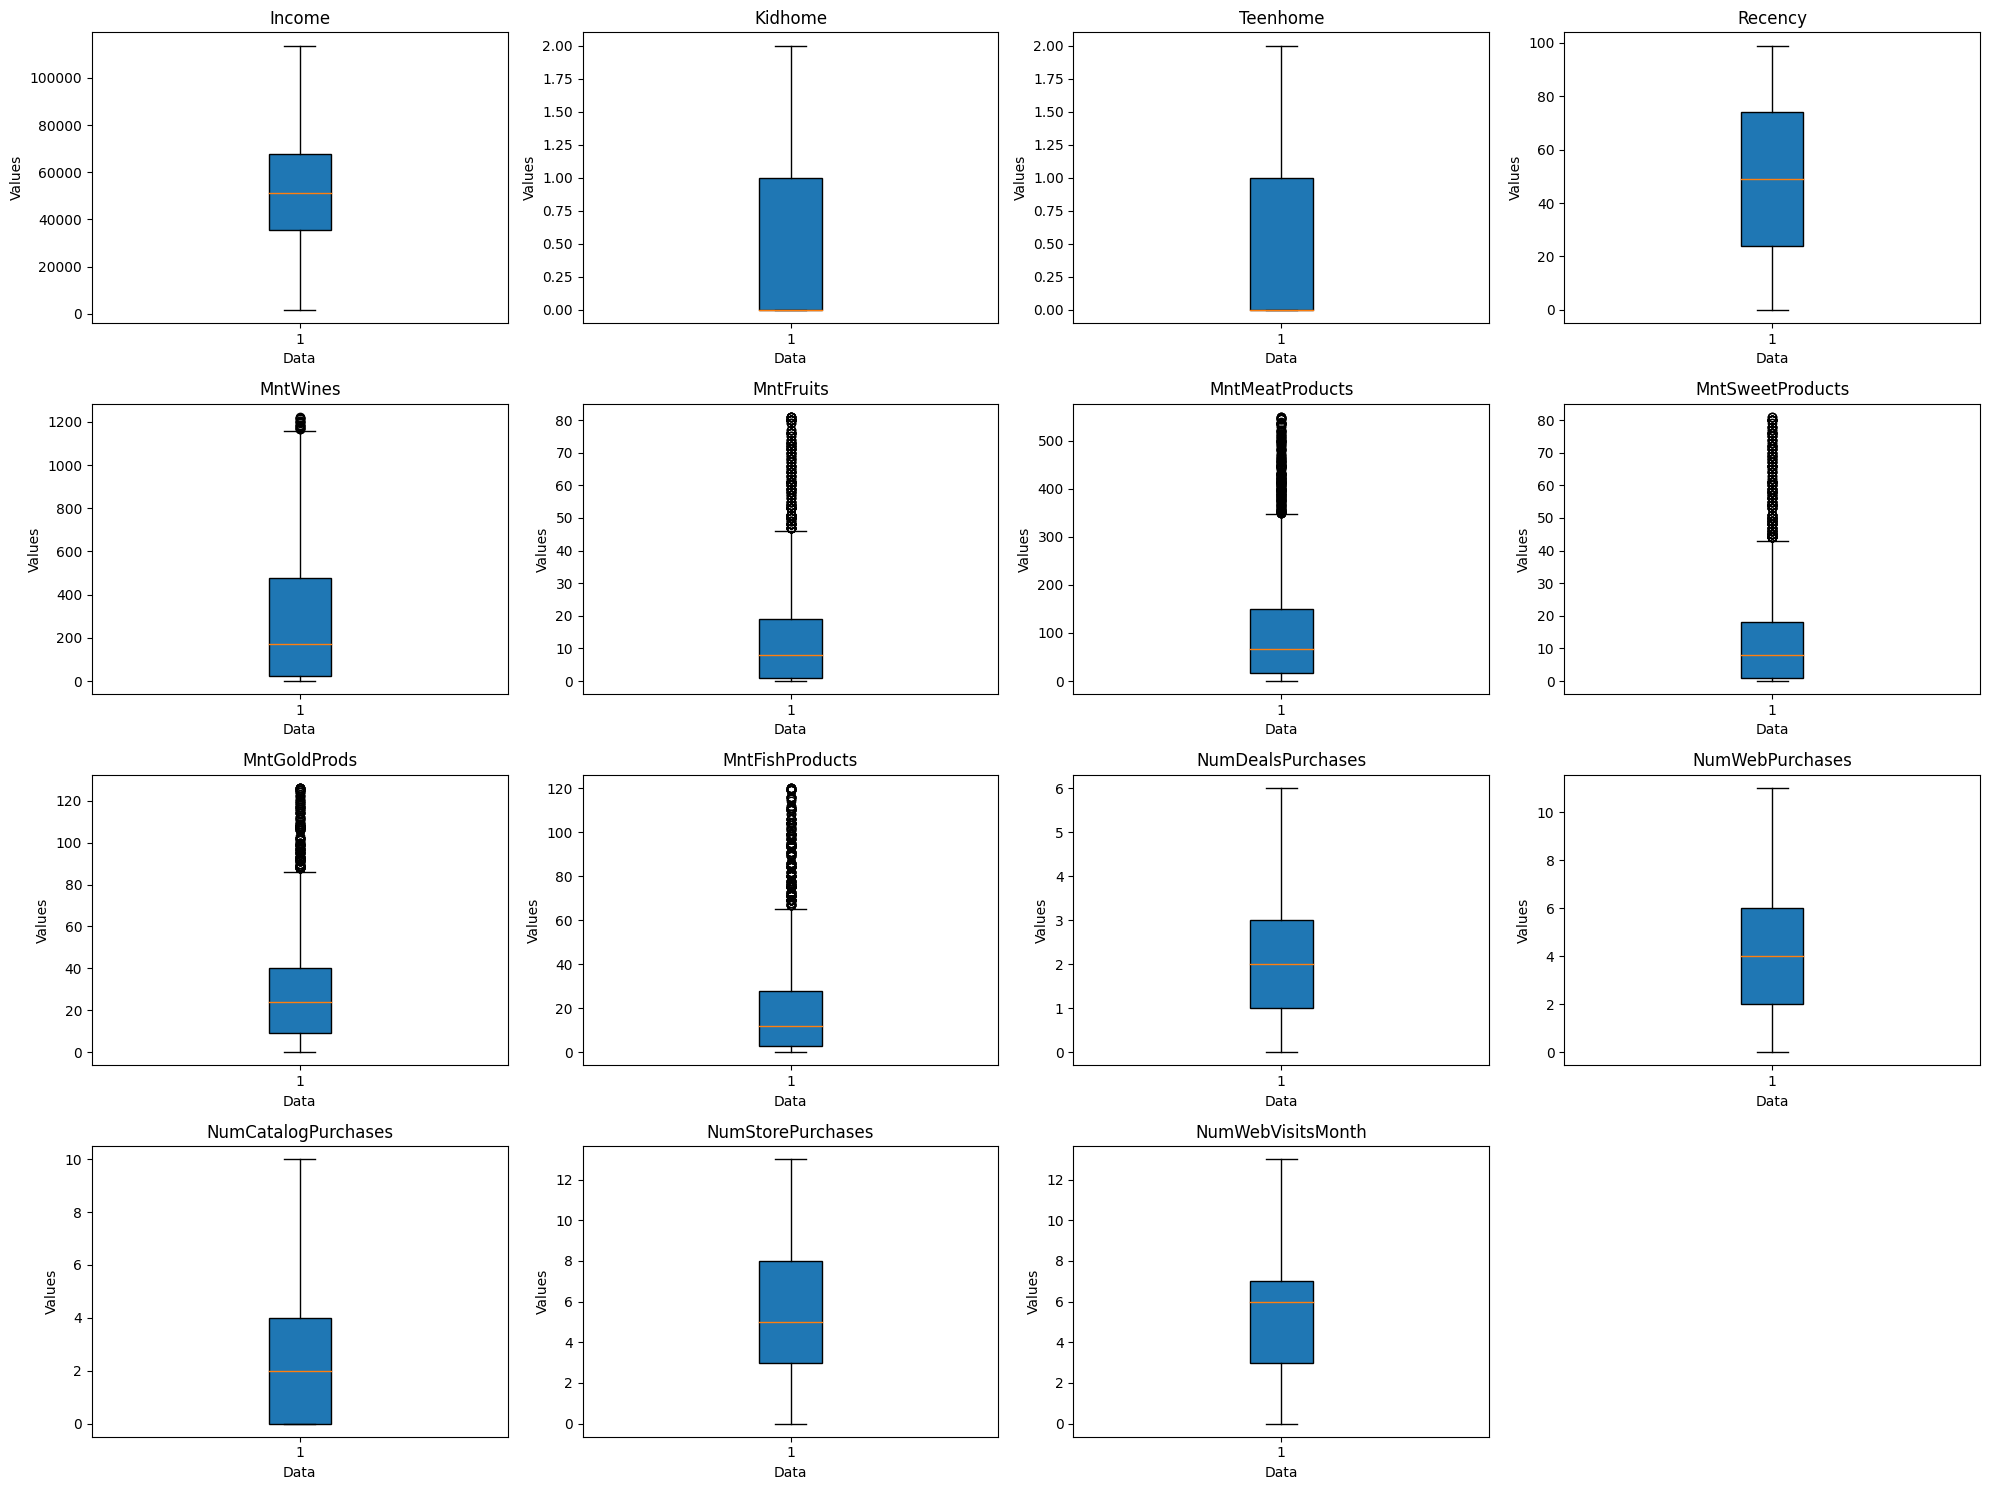

In [131]:
num_cols = len(numerical_df_outliner.columns)
num_rows = math.ceil(num_cols / 4)

plt.figure(figsize=(20, 15))


for i, col in enumerate(numerical_df_outliner.columns):
    plt.subplot(num_rows, 4, i+1)
    plt.boxplot(numerical_df_outliner[col], patch_artist=True)
    plt.title(col)
    plt.xlabel('Data')
    plt.ylabel('Values')

plt.tight_layout()
plt.show()



In [132]:
numerical_df=numerical_df_outliner

In [136]:
# Data exploration technique
#1. Descriptive statiatic
numerical_df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntSweetProducts,MntGoldProds,MntFishProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,51639.243630,0.442557,0.506482,49.119803,285.870809,14.280286,111.234242,13.825659,29.992848,21.323201,2.063478,4.046491,2.541797,5.792579,5.273581
std,20528.571351,0.538279,0.544593,28.913138,310.373119,18.721875,132.979623,18.088433,28.720648,27.835459,1.340004,2.621567,2.625503,3.251789,2.304092
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35682.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,1.000000,9.000000,3.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.000000,8.000000,67.000000,8.000000,24.000000,12.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,67911.000000,1.000000,1.000000,74.000000,479.000000,19.000000,149.000000,18.000000,40.000000,28.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,113734.000000,2.000000,2.000000,99.000000,1224.000000,81.000000,550.000000,81.000000,126.000000,120.000000,6.000000,11.000000,10.000000,13.000000,13.000000


<ipython-input-145-049913c42942>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_df, x=column, palette="Set2")
<ipython-input-145-049913c42942>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_df, x=column, palette="Set2")
<ipython-input-145-049913c42942>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_df, x=column, palette="Set2")
<ipython-input-145-049913c42942>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

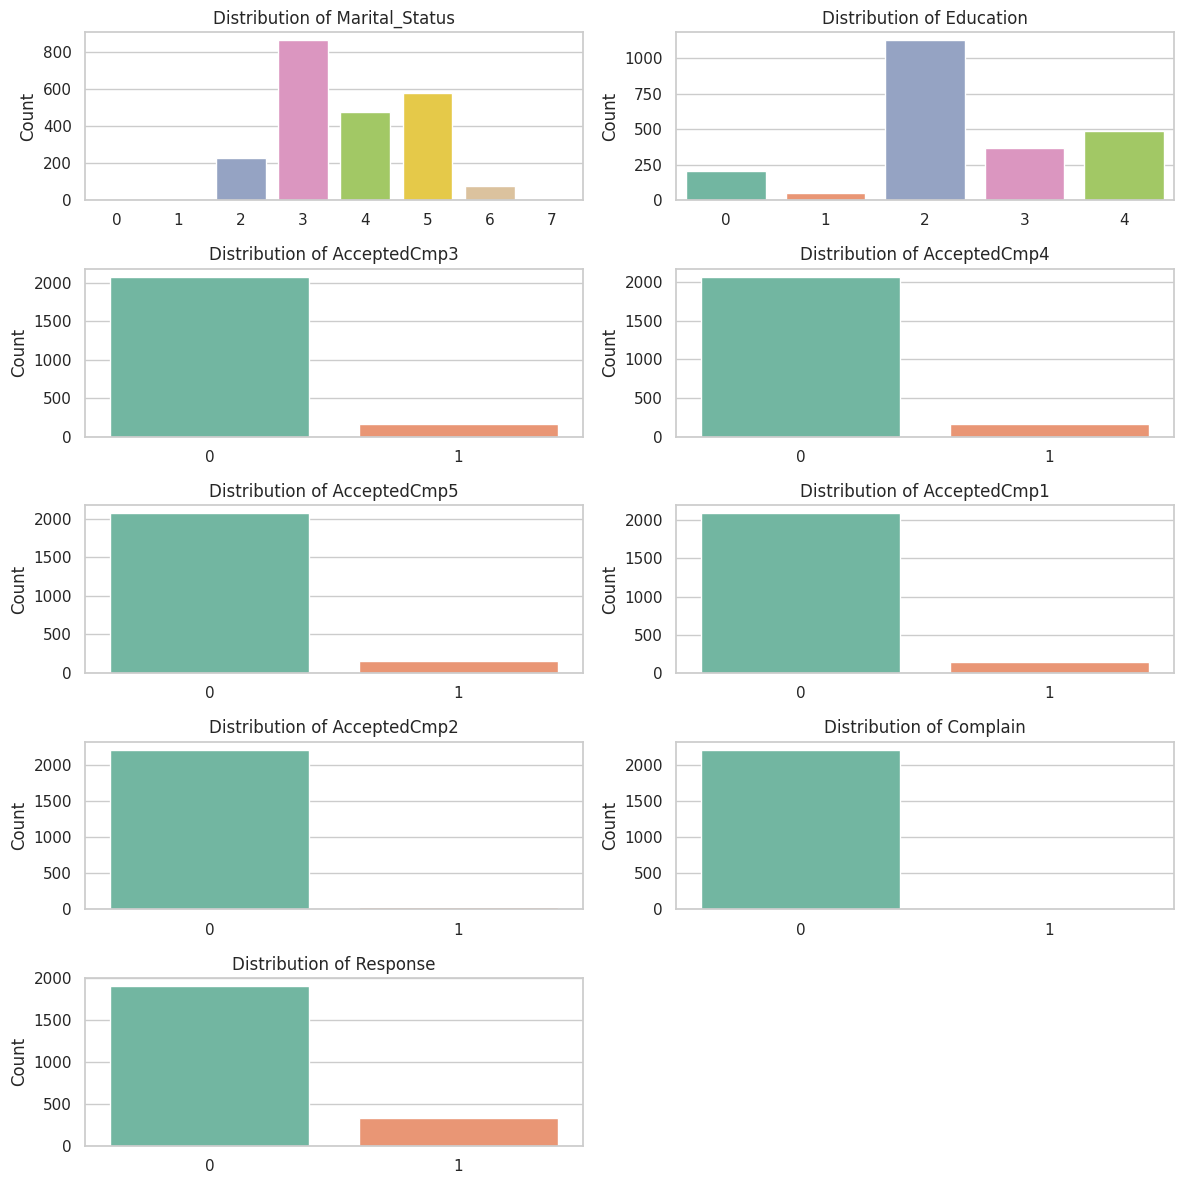

In [145]:
#2. Data Visualization
#visualise category data distrubution
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")

# bar chart visualisation
for i, column in enumerate(categorical_df.columns, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=categorical_df, x=column, palette="Set2")
    plt.title(f'Distribution of {column}')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

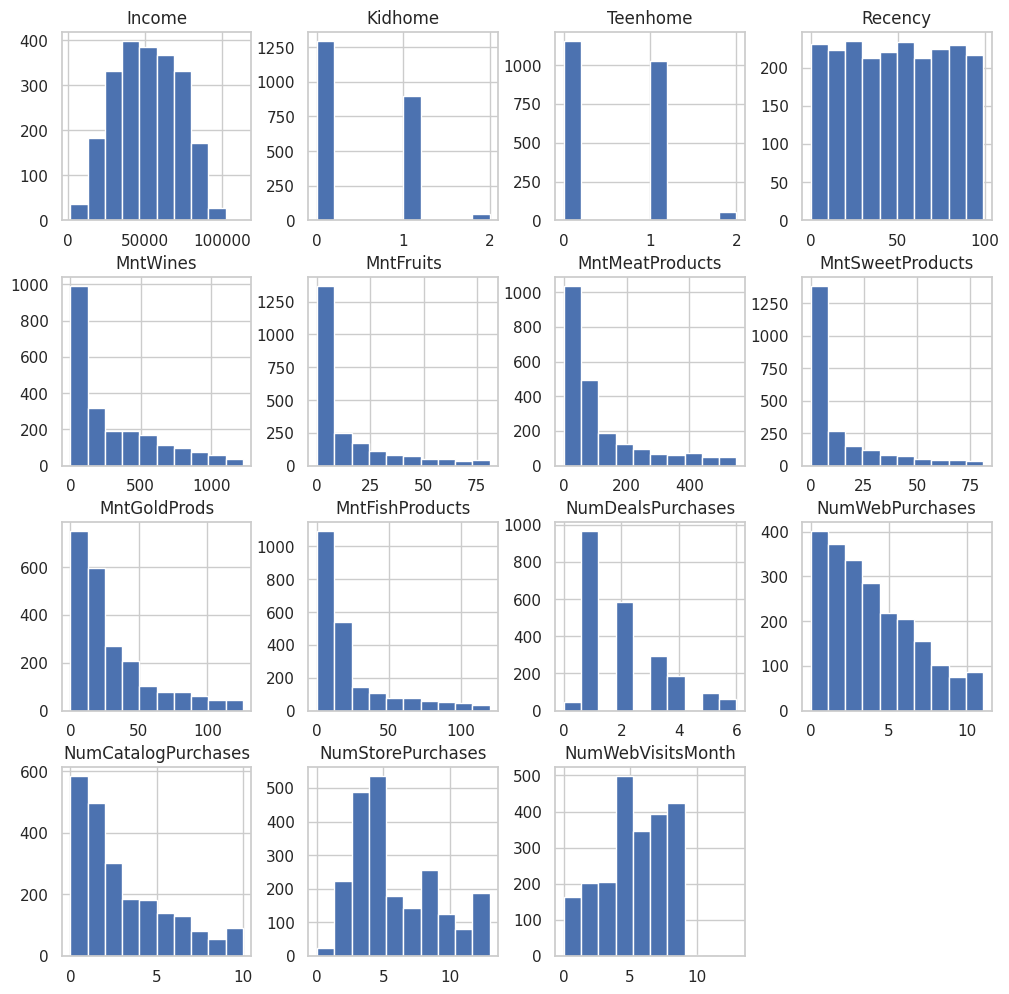

In [147]:
#numerical data visualisation
numerical_df.hist(figsize=(12, 12))
plt.show()

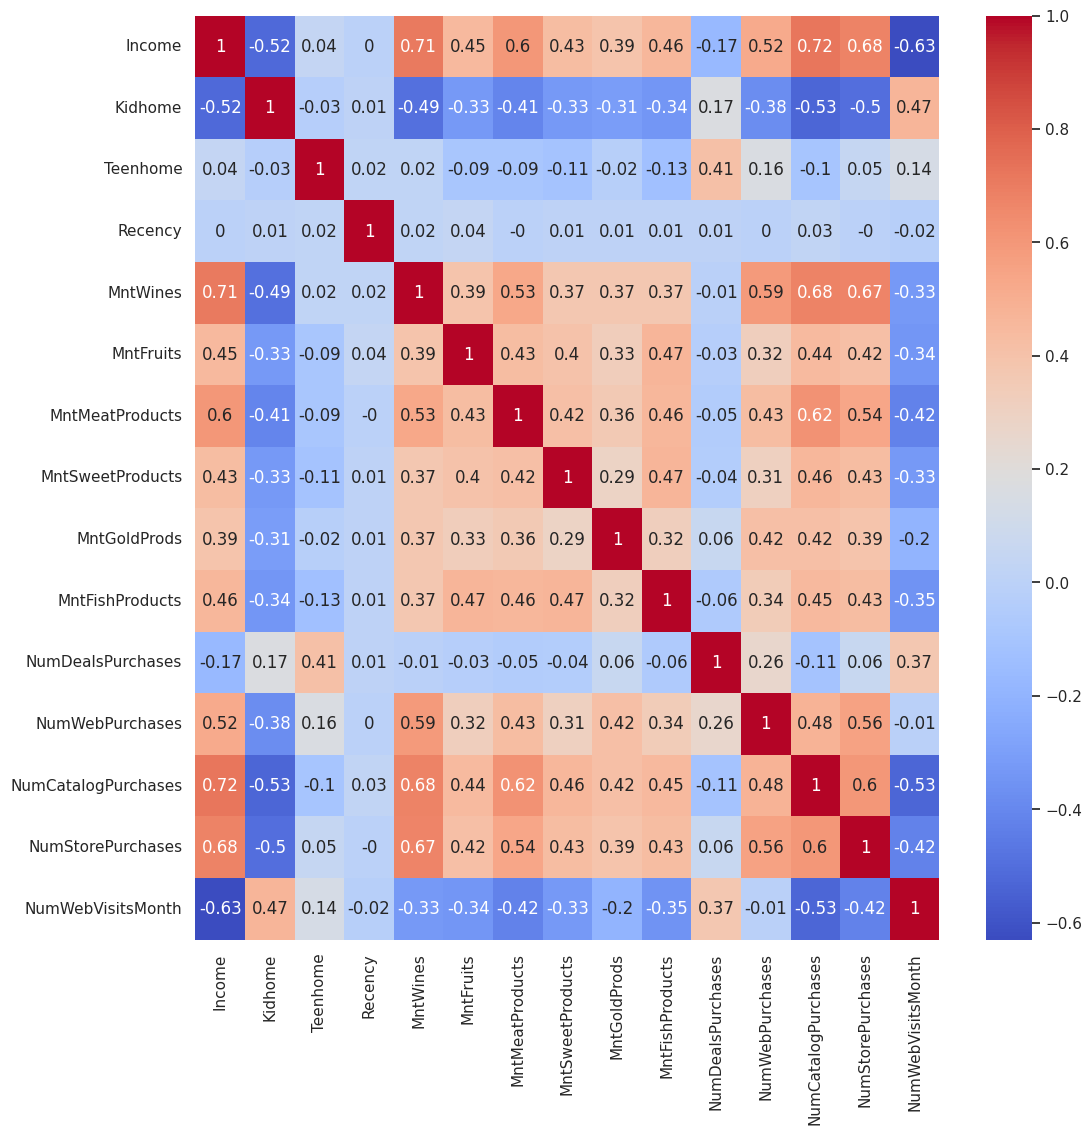

In [151]:
#correlation heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(numerical_df.corr().round(2), annot=True, cmap='coolwarm')
plt.show()